In [1]:
import pandas as pd
import plotly.express as px
from jupyter_dash import JupyterDash
from dash import Dash, dcc, html
from dash.dependencies import Input, Output
import requests
import json
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
url = "http://127.0.0.1:9090/bompollen"


payload = {
    "name": "rocklea"
}

# Send the POST request with headers and JSON data
response = requests.post(url, data=json.dumps(payload))
if response.status_code == 200:
    data_rocklea = response.json()
else:
    print(f"Failed to get data: {response.status_code}")


In [3]:
df_rocklea = pd.DataFrame(data_rocklea)
#df_rocklea

In [4]:
url = "http://127.0.0.1:9090/bompollen"


payload = {
    "name": "canberra"
}

# Send the POST request with headers and JSON data
response = requests.post(url, data=json.dumps(payload))
if response.status_code == 200:
    data_canberra = response.json()
else:
    print(f"Failed to get data: {response.status_code}")

In [5]:
df_canberra = pd.DataFrame(data_canberra)
#df_canberra

In [6]:
url = "http://127.0.0.1:9090/bompollen"


payload = {
    "name": "parkville"
}

# Send the POST request with headers and JSON data
response = requests.post(url, data=json.dumps(payload))
if response.status_code == 200:
    data_parkville = response.json()
else:
    print(f"Failed to get data: {response.status_code}")

In [7]:
df_parkville = pd.DataFrame(data_parkville)
#df_parkville

In [8]:
url = "http://127.0.0.1:9090/bompollen"


payload = {
    "name": "campbelltown"
}

# Send the POST request with headers and JSON data
response = requests.post(url, data=json.dumps(payload))
if response.status_code == 200:
    data_campbelltown = response.json()
else:
    print(f"Failed to get data: {response.status_code}")

In [9]:
df_campbelltown = pd.DataFrame(data_campbelltown)
#df_campbelltown

In [10]:
# Merge DataFrames
df = pd.concat([df_rocklea, df_canberra, df_parkville, df_campbelltown], ignore_index=True)
#df

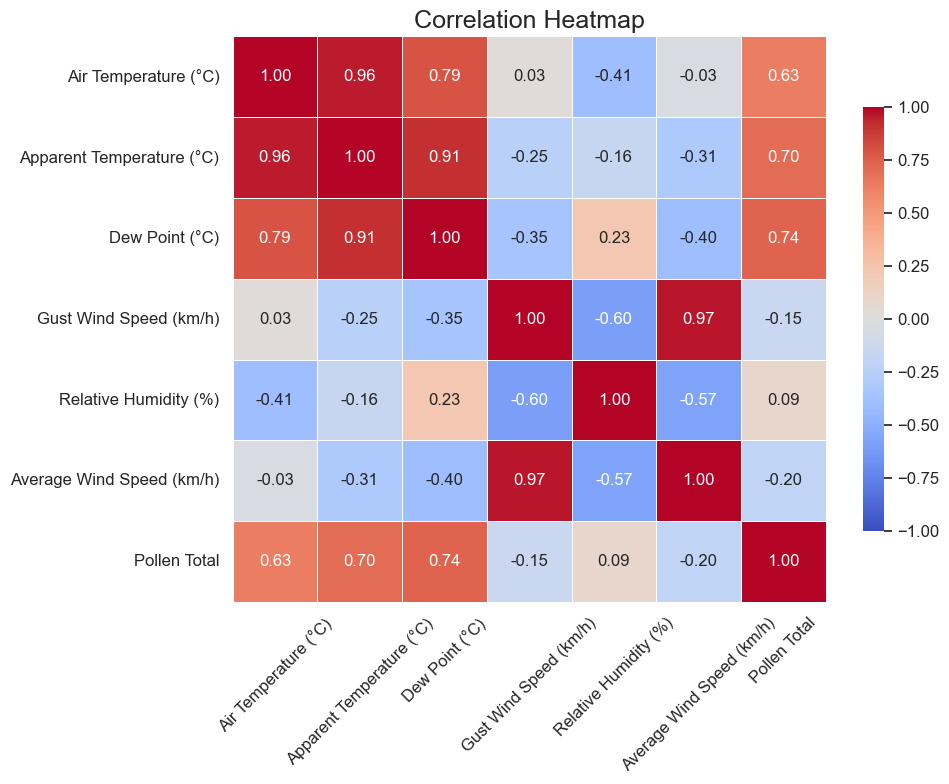

In [11]:
# Rename columns
df_renamed = df.rename(columns={
    'air_temp': 'Air Temperature (°C)',
    'apparent_t': 'Apparent Temperature (°C)',
    'dewpt': 'Dew Point (°C)',
    'gust_kmh': 'Gust Wind Speed (km/h)',
    'rel_hum': 'Relative Humidity (%)',
    'wind_spd_kmh': 'Average Wind Speed (km/h)',
    'pollen_total': 'Pollen Total'
})

# Select numeric columns
numeric_df = df_renamed.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
corr = numeric_df.corr()

# Set plot style
sns.set(style='whitegrid')

# Plot heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0,
                      annot_kws={"size": 12}, fmt=".2f", linewidths=.5, cbar_kws={"shrink": .75})

# Set title and labels
heatmap.set_title('Correlation Heatmap', fontsize=18)
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=12, rotation=45)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=12, rotation=0)

# Adjust colorbar label size
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)

# Display the plot
plt.tight_layout()
plt.show()


In [12]:
expected_columns = ['location', 'pollen_total', 'rel_hum', 'air_temp', 'gust_kmh', 'wind_spd_kmh']
if all(column in df.columns for column in expected_columns):
    df['local_date_time_full'] = pd.to_datetime(df['local_date_time_full'])
    df.set_index('local_date_time_full', inplace=True)
    
    # Print DataFrame to check data
    print("DataFrame after setting datetime index:\n", df.head())
else:
    missing_columns = [column for column in expected_columns if column not in df.columns]
    print(f"The DataFrame does not contain the expected columns: {missing_columns}")


DataFrame after setting datetime index:
                           location  air_temp  apparent_t  dewpt  gust_kmh  \
local_date_time_full                                                        
2024-05-19 06:00:00+00:00  rocklea      13.6        11.3    7.6      15.0   
2024-05-19 06:00:00+00:00  rocklea      13.4        11.7    7.6      13.0   
2024-05-19 05:00:00+00:00  rocklea      13.5        11.6    7.5      13.0   
2024-05-19 05:00:00+00:00  rocklea      13.3        11.4    7.5      17.0   
2024-05-19 04:00:00+00:00  rocklea      13.1        11.3    7.8      15.0   

                           rel_hum  wind_spd_kmh  pollen_total  
local_date_time_full                                            
2024-05-19 06:00:00+00:00       67           9.0    199.925348  
2024-05-19 06:00:00+00:00       68           6.0    219.248680  
2024-05-19 05:00:00+00:00       67           7.0    221.772584  
2024-05-19 05:00:00+00:00       68           7.0    214.870286  
2024-05-19 04:00:00+00:00    

/var/folders/1z/hw1jxlsd21s7yb67j6qr4yzc0000gn/T/ipykernel_56716/4239810900.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['local_date_time_full'] = pd.to_datetime(df['local_date_time_full'])


In [13]:
# Check if all expected columns are present
if all(column in df.columns for column in expected_columns):
    print("DataFrame after setting datetime index:\n", df.head())
else:
    missing_columns = [column for column in expected_columns if column not in df.columns]
    print(f"The DataFrame does not contain the expected columns: {missing_columns}")

DataFrame after setting datetime index:
                           location  air_temp  apparent_t  dewpt  gust_kmh  \
local_date_time_full                                                        
2024-05-19 06:00:00+00:00  rocklea      13.6        11.3    7.6      15.0   
2024-05-19 06:00:00+00:00  rocklea      13.4        11.7    7.6      13.0   
2024-05-19 05:00:00+00:00  rocklea      13.5        11.6    7.5      13.0   
2024-05-19 05:00:00+00:00  rocklea      13.3        11.4    7.5      17.0   
2024-05-19 04:00:00+00:00  rocklea      13.1        11.3    7.8      15.0   

                           rel_hum  wind_spd_kmh  pollen_total  
local_date_time_full                                            
2024-05-19 06:00:00+00:00       67           9.0    199.925348  
2024-05-19 06:00:00+00:00       68           6.0    219.248680  
2024-05-19 05:00:00+00:00       67           7.0    221.772584  
2024-05-19 05:00:00+00:00       68           7.0    214.870286  
2024-05-19 04:00:00+00:00    

In [14]:
# Initialize the Dash app
app = Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    html.H1("Pollen Data Analysis", style={'text-align': 'center', 'color': '#333', 'font-family': 'Arial, sans-serif'}),
    
    # Define the tabs
    dcc.Tabs([
        # Tab 1: Pollen Distribution
        dcc.Tab(label='Pollen Distribution', children=[
            html.Div([
                # Dropdown for selecting location
                dcc.Dropdown(
                    id='location-dropdown',
                    options=[{'label': loc, 'value': loc} for loc in df['location'].unique()],
                    value=df['location'].unique()[0],
                    clearable=False,
                    style={'width': '50%', 'margin': 'auto', 'font-family': 'Arial, sans-serif'}
                ),
                # Graph for displaying pollen distribution
                dcc.Graph(id='pollen-graph', style={'margin': 'auto', 'width': '90%', 'height': '600px'})
            ], style={'background-color': '#f9f9f9', 'padding': '20px'})
        ]),
        
        # Tab 2: Pollen Over Time
        dcc.Tab(label='Pollen Over Time', children=[
            html.Div([
                # Dropdown for selecting location
                dcc.Dropdown(
                    id='location-dropdown-time',
                    options=[{'label': loc, 'value': loc} for loc in df['location'].unique()],
                    value=df['location'].unique()[0],
                    clearable=False,
                    style={'width': '50%', 'margin': 'auto', 'font-family': 'Arial, sans-serif'}
                ),
                # Date picker for selecting date range
                html.Div(
                    dcc.DatePickerRange(
                        id='date-picker-range',
                        start_date=df.index.min().date(),
                        end_date=df.index.max().date(),
                        display_format='YYYY-MM-DD',
                        style={'font-family': 'Arial, sans-serif'}
                    ),
                    style={'text-align': 'center', 'margin': '20px 0'}
                ),
                # Dropdown for selecting variable
                dcc.Dropdown(
                    id='variable-dropdown',
                    options=[
                        {'label': 'Pollen Total', 'value': 'pollen_total'},
                        {'label': 'Relative Humidity', 'value': 'rel_hum'},
                        {'label': 'Air Temperature', 'value': 'air_temp'}
                    ],
                    value='pollen_total',
                    clearable=False,
                    style={'width': '50%', 'margin': 'auto', 'font-family': 'Arial, sans-serif'}
                ),
                # Graph for displaying pollen over time
                dcc.Graph(id='pollen-time-graph', style={'margin': 'auto', 'width': '90%', 'height': '600px'})
            ], style={'background-color': '#f9f9f9', 'padding': '20px'})
        ]),
        
        # Tab 3: Pollen vs Variables
        dcc.Tab(label='Pollen vs Variables', children=[
            html.Div([
                # Dropdown for selecting location
                dcc.Dropdown(
                    id='location-dropdown-variables',
                    options=[{'label': loc, 'value': loc} for loc in df['location'].unique()],
                    value=df['location'].unique()[0],
                    clearable=False,
                    style={'width': '50%', 'margin': 'auto', 'font-family': 'Arial, sans-serif'}
                ),
                # Date picker for selecting date range
                html.Div(
                    dcc.DatePickerRange(
                        id='date-picker-range-variables',
                        start_date=df.index.min().date(),
                        end_date=df.index.max().date(),
                        display_format='YYYY-MM-DD',
                        style={'font-family': 'Arial, sans-serif'}
                    ),
                    style={'text-align': 'center', 'margin': '20px 0'}
                ),
                # Dropdown for selecting variable
                dcc.Dropdown(
                    id='variable-dropdown-variables',
                    options=[
                        {'label': 'Pollen Total vs Relative Humidity', 'value': 'rel_hum'},
                        {'label': 'Pollen Total vs Air Temperature', 'value': 'air_temp'},
                        {'label': 'Pollen Total vs Gust Wind Speed', 'value': 'gust_kmh'},
                        {'label': 'Pollen Total vs Average Wind Speed', 'value': 'wind_spd_kmh'}
                    ],
                    value='rel_hum',
                    clearable=False,
                    style={'width': '50%', 'margin': 'auto', 'font-family': 'Arial, sans-serif'}
                ),
                # Graph for displaying pollen vs variables
                dcc.Graph(id='pollen-variables-graph', style={'margin': 'auto', 'width': '90%', 'height': '600px'})
            ], style={'background-color': '#f9f9f9', 'padding': '20px'})
        ])
    ])
])


In [15]:
@app.callback(
    Output('pollen-graph', 'figure'),
    [Input('location-dropdown', 'value')]
)
def update_graph(selected_location):
    # Filter the DataFrame based on the selected location
    filtered_df = df[df['location'] == selected_location]
    
    # Create a histogram of the pollen total for the selected location
    fig = px.histogram(
        filtered_df, 
        x='pollen_total', 
        nbins=20, 
        title=f'Distribution of Pollen Total in {selected_location}',
        labels={'pollen_total': 'Pollen Total'}, 
        color_discrete_sequence=['#1E90FF']
    )
    
    # Update the hover template and marker line
    fig.update_traces(
        hovertemplate='<b>Pollen Total:</b> %{x:.2f}<extra></extra>',
        marker=dict(line=dict(color='#000000', width=1))
    )

    # Update the layout of the figure
    fig.update_layout(
        title={
            'text': f'Distribution of Pollen Total in {selected_location}',
            'y': 0.95,  # Position the title slightly higher
            'x': 0.5,  # Center the title horizontally
            'xanchor': 'center',  # Anchor the title at the center
            'yanchor': 'top',  # Anchor the title at the top
            'font': {'family': 'Arial, sans-serif', 'size': 20, 'color': '#333'}  # Font settings for the title
        },
        plot_bgcolor='white',  # Background color of the plot
        paper_bgcolor='white',  # Background color of the paper
        xaxis=dict(showgrid=True, gridcolor='LightGray', title='Pollen Total'),  # X-axis settings
        yaxis=dict(showgrid=True, gridcolor='LightGray', title='Count'),  # Y-axis settings
        font=dict(family="Arial, sans-serif", size=12, color="black"),  # Font settings for the entire plot
        margin=dict(l=40, r=40, t=60, b=40)  # Margins for the plot
    )
    
    return fig


In [16]:
@app.callback(
    Output('pollen-time-graph', 'figure'),
    [Input('location-dropdown-time', 'value'),
     Input('date-picker-range', 'start_date'),
     Input('date-picker-range', 'end_date'),
     Input('variable-dropdown', 'value')]
)
def update_time_graph(selected_location, start_date, end_date, selected_variable):
    # Filter the DataFrame based on the selected location and date range
    filtered_df = df[(df['location'] == selected_location) & 
                     (df.index.date >= pd.to_datetime(start_date).date()) & 
                     (df.index.date <= pd.to_datetime(end_date).date())]

    # Initialize an empty figure
    fig = go.Figure()

    # Check if the filtered DataFrame is not empty
    if not filtered_df.empty:
        # Add a scatter trace to the figure
        fig.add_trace(go.Scatter(
            x=filtered_df.index,  # X-axis: date and time
            y=filtered_df[selected_variable],  # Y-axis: selected variable
            mode='markers+lines',  # Show both markers and lines
            name=selected_variable,  # Name of the trace
            marker=dict(
                color=filtered_df[selected_variable],  # Color based on the selected variable
                colorscale='Plasma',  # Colorscale for the markers
                showscale=True,  # Show the color scale
                colorbar=dict(
                    title=selected_variable.replace('_', ' ').title()  # Title for the color bar
                )
            ),
            line=dict(
                color='gray'  # Color of the line
            ),
            customdata=filtered_df.index.strftime('%Y-%m-%d %H:%M:%S')  # Custom data for hover information
        ))

        # Define the hover template
        hover_template = (
            '<b>Time:</b> %{customdata}<br>' +
            f'<b>{selected_variable.replace("_", " ").title()}:</b> ' + '%{y:.2f}<extra></extra>'
        )

        # Update the trace with the hover template
        fig.update_traces(hovertemplate=hover_template)

    # Update the layout of the figure
    fig.update_layout(
        title={
            'text': f'{selected_variable.replace("_", " ").title()} Over Time',
            'y': 0.9,  # Position the title slightly lower
            'x': 0.5,  # Center the title horizontally
            'xanchor': 'center',  # Anchor the title at the center
            'yanchor': 'top'  # Anchor the title at the top
        },
        xaxis_title='Time',  # X-axis title
        yaxis_title=selected_variable.replace('_', ' ').title(),  # Y-axis title
        hovermode='x',  # Hover mode
        plot_bgcolor='rgba(0,0,0,0)',  # Background color of the plot
        xaxis=dict(
            showgrid=False  # Do not show the grid on the x-axis
        ),
        yaxis=dict(
            showgrid=True,  # Show the grid on the y-axis
            gridcolor='lightgray'  # Grid color
        ),
        font=dict(
            family="Arial, sans-serif",  # Font family
            size=12,  # Font size
            color="black"  # Font color
        )
    )
    
    return fig


In [17]:
@app.callback(
    Output('pollen-variables-graph', 'figure'),
    [Input('location-dropdown-variables', 'value'),
     Input('date-picker-range-variables', 'start_date'),
     Input('date-picker-range-variables', 'end_date'),
     Input('variable-dropdown-variables', 'value')]
)
def update_variables_graph(selected_location, start_date, end_date, selected_variable):
    # Filter the DataFrame based on the selected location and date range
    filtered_df = df[(df['location'] == selected_location) & 
                     (df.index.date >= pd.to_datetime(start_date).date()) & 
                     (df.index.date <= pd.to_datetime(end_date).date())]

    # Create a scatter plot
    fig = px.scatter(filtered_df, x=selected_variable, y='pollen_total',
                     title=f'Pollen Total vs {selected_variable.replace("_", " ").title()} in {selected_location}',
                     labels={selected_variable: selected_variable.replace('_', ' ').title(), 'pollen_total': 'Pollen Total'},
                     color=selected_variable, color_continuous_scale='Viridis')

    # Update the trace with custom hover template and marker settings
    fig.update_traces(
        hovertemplate=f'<b>{selected_variable.replace("_", " ").title()}:</b> %{{x}}<br><b>Pollen Total:</b> %{{y}}<extra></extra>',
        marker=dict(size=10, opacity=0.7, line=dict(color='#000000', width=1))
    )

    # Update the layout of the figure
    fig.update_layout(
        title={
            'text': f'Pollen Total vs {selected_variable.replace("_", " ").title()} in {selected_location}',
            'y': 0.95,  # Position the title slightly lower
            'x': 0.5,  # Center the title horizontally
            'xanchor': 'center',  # Anchor the title at the center
            'yanchor': 'top'  # Anchor the title at the top
        },
        plot_bgcolor='white',  # Background color of the plot
        paper_bgcolor='white',  # Background color of the paper
        xaxis=dict(showgrid=True, gridcolor='LightGray', title=selected_variable.replace('_', ' ').title()),  # X-axis settings
        yaxis=dict(showgrid=True, gridcolor='LightGray', title='Pollen Total'),  # Y-axis settings
        font=dict(family="Arial, sans-serif", size=12, color="black"),  # Font settings
        margin=dict(l=40, r=40, t=60, b=40)  # Margin settings
    )
    
    return fig


In [18]:
if __name__ == '__main__':
    app.run_server(debug=True)